## **Best Neighborhood In Pittsburgh for Sledding**

### **Introduction:** 
Our goal is to find the best neighbourhood in Pittsburgh for sledding. Sledding is one of the most fun activities to participate in during the winter. During dark, cold times, sledding provides a whole new winter experience, and my partner and I have decided that exploring the best neighbourhood is a valuable asset. Some might argue that sledding is based solley on the house where you live. However after discussion, is was concluded that it is not uncommmon for people to go to certain destinations for the sole purpose of sledding. 
We will determine the best neighbourhood based on 3 metrics and the one with the overall best statistics will take the cake

## **Best Neighborhood In Pittsburgh for Sledding**
The metrics we decided to use when coming up with were step data, slope data and park data:-

Step data- After heavy debate, my partner and I decided that steps wwas a viable data set because when there is enough snow, stairs make a great sledding path. 

Slope data- This is an obvious data set. One of the main factors that are required for sledding is a good slope that will allow your sled to travel with a speed that is both safe and fun at the same time. 

Park data- Since all areas are not accessible, we decided that the inclusion of a park data set would be beneficial in finding the area for sledding. Parks not only provide a safe area to have fun, but also provide the ability to do other activities before or after sledding, such as picnicing or playing a game in the snow.


In [11]:
import pandas as pd
import matplotlib.pyplot as plot

parkData = pd.read_csv('ParkDataSet.csv')
stepData = pd.read_csv('StepsDataSet.csv')
#parkData.head(10)
#slopeData.head(10)

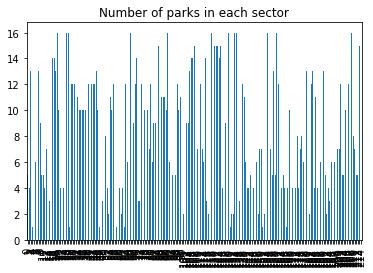

In [14]:
pdataFrame = parkData['sector']
pdataFrame.plot.bar(x = "Sectors", y = "Number of Parks", title = "Number of parks in each sector")
#pdataFrame.show(block = True)

{'Neighborhood Park': 109, 'Regional Park': 19, 'Community Park': 23, 'Beautification Site': 42, 'Special Use Park': 12, 'Riverfront Park': 7, 'Other': 1, 'Public School': 2}


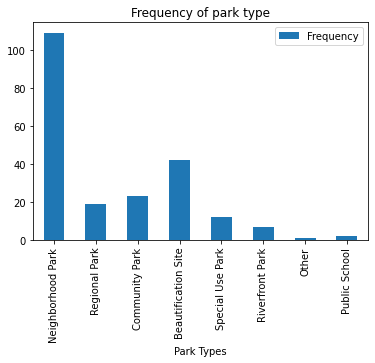

In [15]:
pdata = {"Park Types": [], "Frequency": []}
for index, row in parkData.iterrows():
    if row['final_cat'] in pdata['Park Types']:
        index = pdata['Park Types'].index(row['final_cat'])
        pdata["Frequency"][index] = pdata["Frequency"][index] + 1
    else:
        pdata['Park Types'].append(row['final_cat'])
        pdata["Frequency"].append(1)
#print(pdata)
df = pd.DataFrame(pdata)
df.plot.bar(x = 'Park Types', y = 'Frequency', title = 'Frequency of park type')

pdata = {}
for index, row in parkData.iterrows():
    #print(row[4])
    
    if pdata.get(row['final_cat']) == None:
        pdata[row['final_cat']] = 1
    else:
        pdata[row['final_cat']] = pdata[row['final_cat']] + 1

#df = pd.DataFrame(pdata)
#df.plot.bar(x = 'Park Type', y = 'Frequency', title = 'Frequency of park type')
print(pdata)


In [18]:
#sData = {"50 < Steps": [], "20-50 Steps": [], "20 > Stpes": []}
sData = {"Step Cats": ["50 < Steps", "20-50 Steps", "20 > Stpes"], "Number of Steps": []}
for index, row in stepData.iterrows():
    if row['number_of_steps'] < 20:
        sData['Number of Steps'].append(1)
    elif row['number_of_steps'] < 50:
        sData['Number of Steps'][1].append(1)
    elif row['number_of_steps'] >= 50:
        sData['Number of Steps'][2].append(1)
#print(sData)
df = pd.DataFrame(sData)
df.plot.bar(x = 'Step Cats', y = 'Number of Steps', title = 'Frequency of step Categories')

IndexError: list index out of range

## We Decided to look at slope throught the entierty of the Pittsburgh Neighbourhoods. The dataset we found was only available in the shape format, so we made it work the best we could. 

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

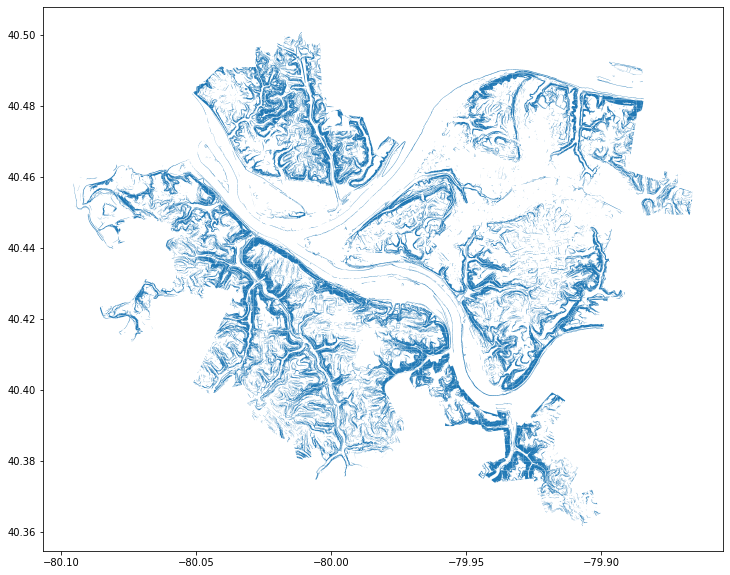

In [36]:
neighborhoods = geopandas.read_file("ShapeFiles/fec820c6-5238-49a5-a8d6-d064cf5b582f2020328-1-xkwj6i.ci16.shp") # read in the shapefile
neighborhoods.plot(figsize=(15, 10))

### In order to incooporate the data into our Final decision, we merged datasets and incoorporated slope, steps and parks. 